<a href="https://colab.research.google.com/github/yash44224422/Meteorological-Conditions-App-/blob/main/9_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective : To build a Random Forest Classifier using the Banking Dataset  in Order to predict  Whether customer Will buy the term Deposit Plan

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#load the dataset
bank_data=pd.read_csv('/content/drive/MyDrive/sem 2/aiml dataset/banking.csv')

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#Preprocessing of data
#Find the unique value of education
bank_data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
#Find the unique value of education
bank_data['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
#convert default colum to numeric
bank_data['default'] = bank_data['default'].map({'unknown': 0, 'no': 0, 'yes': 1})

In [ ]:
# Create a features array
features = ['age', 'default', 'cons_price_idx', 'cons_conf_idx']

#prepare data
bank_data['y'].unique()

array([0, 1])

In [ ]:
x=bank_data[features]
y=bank_data['y']

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [ ]:
# Build the model
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,
                              criterion='entropy',
                              max_depth=5,
                              max_features='auto',
                              bootstrap=True,
                              random_state=45)


In [ ]:
# Train the model
rfc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=1000, random_state=45)

In [ ]:
#Test the model
y_pred=rfc.predict(x_test)

In [ ]:
#compute accuracy of model
from sklearn.metrics import accuracy_score
print('Accuracy:',(accuracy_score(y_test,y_pred)*100))

Accuracy: 88.7027595694748


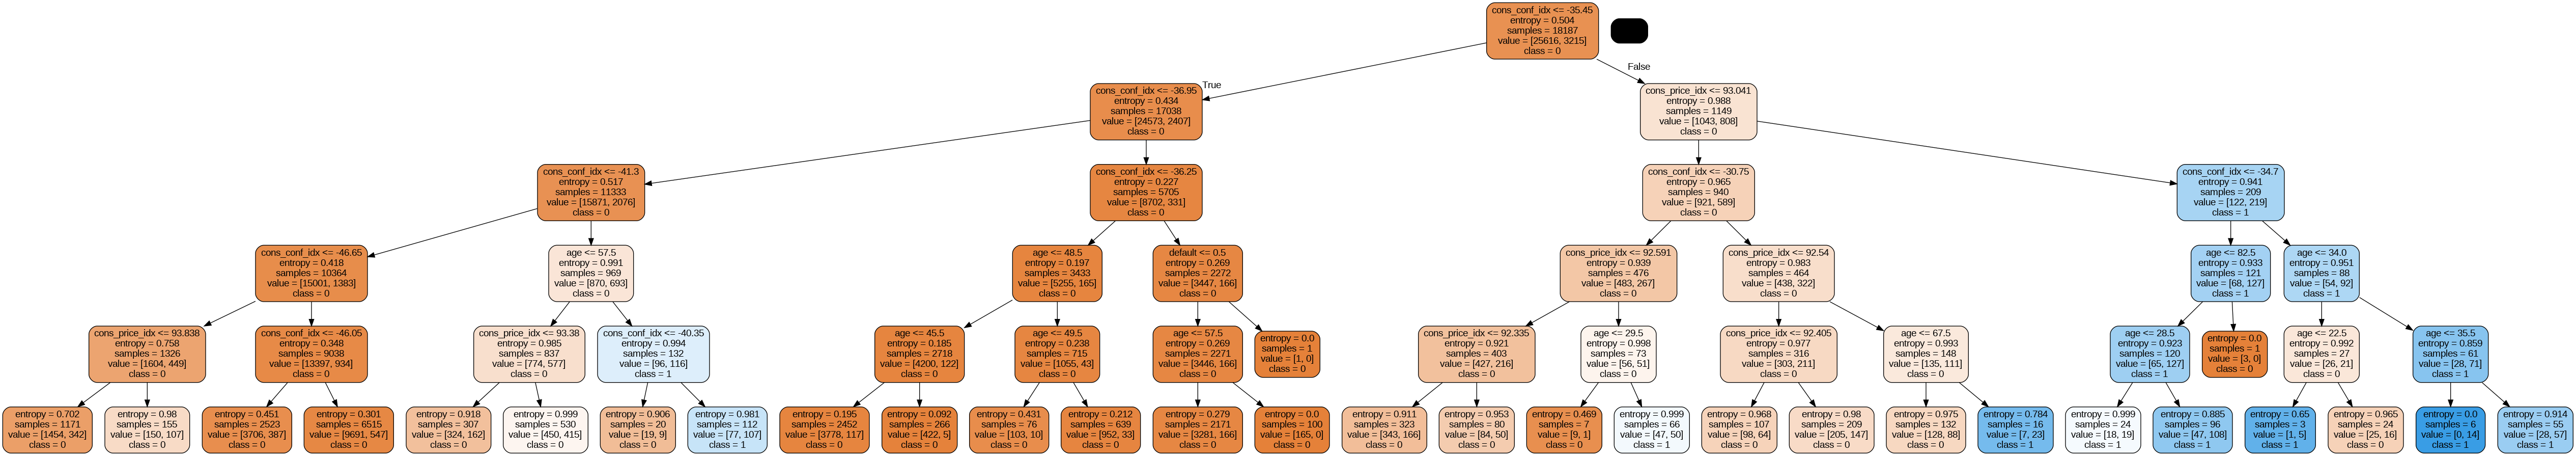

In [ ]:
#Visualize the decision tree
from sklearn.tree import export_graphviz #graphic pakage
from io import StringIO
from IPython.display import Image
import pydotplus

out=StringIO()

export_graphviz(rfc.estimators_[0],out_file=out,feature_names=features,class_names=['0','1'],filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(out.getvalue())

graph.write_png('rfc.png')

Image(graph.create_png())
